In [448]:
from pynq import Overlay
overlay = Overlay('/home/xilinx/pynq/overlays/User_overlay/LOG_TE.bit')

In [449]:
from pynq import Clocks

print(f'CPU:   {Clocks.cpu_mhz:.6f}MHz')
print(f'FCLK0: {Clocks.fclk0_mhz:.6f}MHz')
print(f'FCLK1: {Clocks.fclk1_mhz:.6f}MHz')
print(f'FCLK2: {Clocks.fclk2_mhz:.6f}MHz')
print(f'FCLK3: {Clocks.fclk3_mhz:.6f}MHz')

CPU:   650.000000MHz
FCLK0: 62.500000MHz
FCLK1: 100.000000MHz
FCLK2: 100.000000MHz
FCLK3: 100.000000MHz


In [450]:
Clocks.fclk0_mhz = 125

print(f'CPU:   {Clocks.cpu_mhz:.6f}MHz')
print(f'FCLK0: {Clocks.fclk0_mhz:.6f}MHz')
print(f'FCLK1: {Clocks.fclk1_mhz:.6f}MHz')
print(f'FCLK2: {Clocks.fclk2_mhz:.6f}MHz')
print(f'FCLK3: {Clocks.fclk3_mhz:.6f}MHz')

CPU:   650.000000MHz
FCLK0: 125.000000MHz
FCLK1: 100.000000MHz
FCLK2: 100.000000MHz
FCLK3: 100.000000MHz


In [451]:
import pynq.lib.dma
import numpy as np
from pynq import Xlnk

dma = overlay.axi_dma_0

In [452]:
dma.recvchannel.idle

False

## Programmable logic

In [453]:
from pynq import allocate

n = 2**20
print('%d samples' % n)
input_buffer = allocate(shape=(n,), dtype=np.uint64)
output_buffer= allocate(shape=(n,), dtype=np.uint32)

1048576 samples


In [454]:
# generate the inputs
input_value = np.random.randint(1,2**63-1,n, dtype=np.uint64)
#input_value = np.ones(n)*980224589148123649
# convert into int64
input_value = input_value.astype(np.uint64)
# load to the input buffer
np.copyto(input_buffer,input_value)

##  Computation time

In [455]:
import time
time_s=time.time()
dma.sendchannel.transfer(input_buffer)
dma.recvchannel.transfer(output_buffer)

dma.sendchannel.wait()
dma.recvchannel.wait()
time_pl=time.time()-time_s
print(time_pl)

0.011386871337890625


In [456]:
#Conversion from fixed point to readable number
out_pl=output_buffer/(2**10)

## Processor computation time

In [457]:
import time
time_s=time.time()
out_ps=np.log2(input_value)
time_ps=time.time()-time_s
print(time_ps)

0.3762171268463135


### Computation time comparison

In [458]:
print("%d input samples" % n)
print("PL computation time = %f s" % time_pl)
print("PS computation time = %f s" % time_ps)
print("PL is %f times faster than the PS" % (time_ps/time_pl))

1048576 input samples
PL computation time = 0.011387 s
PS computation time = 0.376217 s
PL is 33.039552 times faster than the PS


## Error evaluation

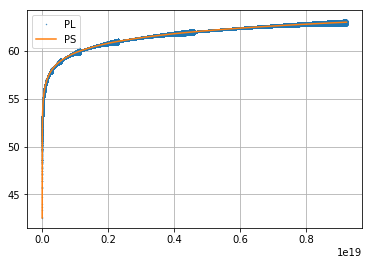

In [459]:
import matplotlib.pyplot as plt

input_value_sort = np.sort(input_value, kind='heapsort')
out_ps_sort      = np.sort(out_ps     , kind='heapsort')

plt.plot(input_value    ,out_pl      , '.', markersize=0.8, label="PL")
plt.plot(input_value_sort,out_ps_sort, '-', label="PS")

#plt.xlim(0.45e19,0.95e19)
#plt.ylim(61.5,63.5)

plt.legend()
plt.grid(True)
plt.show()

In [460]:
error_a = (out_pl-out_ps)
error_r = (out_pl-out_ps)/out_ps

### Relative error distribution

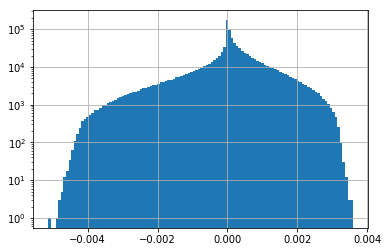

In [461]:
plt.hist(error_r,bins=120)
plt.semilogy()
plt.grid(True)
plt.show()

In [462]:
print("Mean relative error distribution               = %f " % np.mean(error_r))
print("Standard deviation relative error distribution = %f " % np.std(error_r))

Mean relative error distribution               = 0.000058 
Standard deviation relative error distribution = 0.001026 


### Absolute error distribution

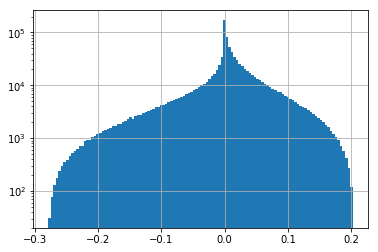

In [463]:
plt.hist(error_a,bins=120)
plt.semilogy()
plt.grid(True)
plt.show()

In [464]:
print("Mean absolute error distribution               = %f " % np.mean(error_a))
print("Standard deviation absolute error distribution = %f " % np.std(error_a))

Mean absolute error distribution               = 0.003569 
Standard deviation absolute error distribution = 0.063442 


In [467]:
# looking for errors
np.where(np.abs(error_a)>5*np.std(error_a))

(array([], dtype=int32),)

In [485]:
import matplotlib.pyplot as plt
from pynq import Overlay
overlay = Overlay('/home/xilinx/pynq/overlays/User_overlay/LOG_LUT1.bit')

In [486]:
from pynq import Clocks

print(f'CPU:   {Clocks.cpu_mhz:.6f}MHz')
print(f'FCLK0: {Clocks.fclk0_mhz:.6f}MHz')
print(f'FCLK1: {Clocks.fclk1_mhz:.6f}MHz')
print(f'FCLK2: {Clocks.fclk2_mhz:.6f}MHz')
print(f'FCLK3: {Clocks.fclk3_mhz:.6f}MHz')

CPU:   650.000000MHz
FCLK0: 62.500000MHz
FCLK1: 100.000000MHz
FCLK2: 100.000000MHz
FCLK3: 100.000000MHz


In [487]:
Clocks.fclk0_mhz = 125

print(f'CPU:   {Clocks.cpu_mhz:.6f}MHz')
print(f'FCLK0: {Clocks.fclk0_mhz:.6f}MHz')
print(f'FCLK1: {Clocks.fclk1_mhz:.6f}MHz')
print(f'FCLK2: {Clocks.fclk2_mhz:.6f}MHz')
print(f'FCLK3: {Clocks.fclk3_mhz:.6f}MHz')

CPU:   650.000000MHz
FCLK0: 125.000000MHz
FCLK1: 100.000000MHz
FCLK2: 100.000000MHz
FCLK3: 100.000000MHz


In [488]:
import pynq.lib.dma
import numpy as np
from pynq import Xlnk

dma = overlay.axi_dma_0

In [489]:
from pynq import allocate

n = 2**20
print('%d samples' % n)
input_buffer = allocate(shape=(n,), dtype=np.uint64)
output_buffer= allocate(shape=(n,), dtype=np.uint16)

1048576 samples


In [490]:
# generate the inputs
input_value = np.random.randint(1,2**64-1,n, dtype=np.uint64)
# convert into int64
input_value = input_value.astype(np.uint64)
# load to the input buffer
np.copyto(input_buffer,input_value)

In [491]:
import time
time_s=time.time()
dma.sendchannel.transfer(input_buffer)
dma.recvchannel.transfer(output_buffer)

dma.sendchannel.wait()
dma.recvchannel.wait()
time_pl=time.time()-time_s
print(time_pl)

0.011411428451538086


In [492]:
#Conversion from fixed point to readable number
out_pl=output_buffer/(2**10)

In [493]:
import time
time_s=time.time()
out_ps=np.log2(input_value)
time_ps=time.time()-time_s
print(time_ps)

0.37958860397338867


In [494]:
print("%d input samples" % n)
print("PL computation time = %f s" % time_pl)
print("PS computation time = %f s" % time_ps)
print("PL is %f times faster than the PS" % (time_ps/time_pl))

1048576 input samples
PL computation time = 0.011411 s
PS computation time = 0.379589 s
PL is 33.263899 times faster than the PS


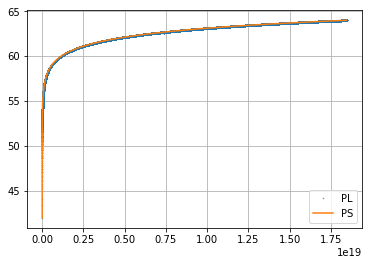

In [495]:
input_value_sort = np.sort(input_value, kind='heapsort')
out_ps_sort      = np.sort(out_ps     , kind='heapsort')

plt.plot(input_value    ,out_pl      , '.', markersize=0.8, label="PL")
plt.plot(input_value_sort,out_ps_sort, '-', label="PS")

plt.legend()
plt.grid(True)
plt.show()

In [496]:
error_a = (out_ps-out_pl)
error_r = (out_ps-out_pl)/out_ps

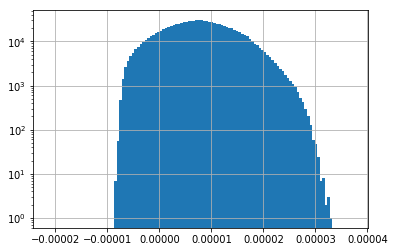

In [497]:
plt.hist(error_r,bins=120, range=(np.mean(error_r)-4*np.std(error_r),np.mean(error_r)+4*np.std(error_r)))
plt.semilogy()
plt.grid(True)
plt.show()

In [498]:
print("Mean relative error distribution               = %f " % np.mean(error_r))
print("Standard deviation relative error distribution = %f " % np.std(error_r))

Mean relative error distribution               = 0.000008 
Standard deviation relative error distribution = 0.000007 


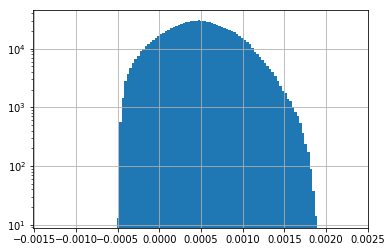

In [499]:
plt.hist(error_a,bins=120, range=(np.mean(error_a)-4*np.std(error_a),np.mean(error_a)+4*np.std(error_a)))
plt.semilogy()
plt.grid(True)
plt.show()

In [500]:
print("Mean absolute error distribution               = %f " % np.mean(error_a))
print("Standard deviation absolute error distribution = %f " % np.std(error_a))

Mean absolute error distribution               = 0.000493 
Standard deviation absolute error distribution = 0.000456 


In [502]:
# looking for errors
np.where(np.abs(error_a)>5*np.std(error_a))

(array([74], dtype=int32),)